# DVB-S2X Modulation Generation
Generate the various modulation types used in DVB-S2X:
QPSK,
8PSK,
8APSK,
16APSK,
32APSK,
64APSK,
128APSK, 
256APSK

### Imports

In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../../library')
import fir_filter
import generic_modem
import comms_filters
import matched_filter
import carrier_recovery_costas
import timing_recovery_gardner
import demodulator
import recovery

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create Some Random Data

In [72]:
data_length = 4096*8
data = [np.random.randint(2) for _ in range(data_length)]

### Create a RRC Filter

In [73]:
samples_per_symbol = 8
rrc_factor = 0.5
pulse_length = 5
filter_type = "RRC"

pulse_coefficients = comms_filters.rrcosfilter( N = pulse_length*samples_per_symbol, 
                                                alpha  = rrc_factor, 
                                                Ts = 1, 
                                                Fs = samples_per_symbol)[1]

### Test The Modulators

#### BPSK

In [74]:
modem_bpsk_obj = generic_modem.generic_modem(   modulation_type = ["129", "BPSK 1/5"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

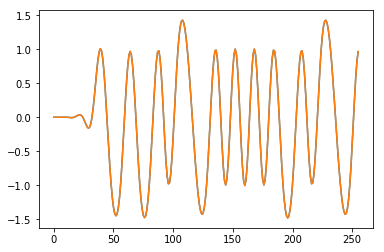

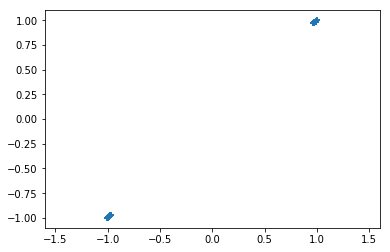

In [106]:
# modulate the signal
waveform_bpsk = modem_bpsk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj = matched_filter.matched_filter( filter_type = filter_type, 
                                                    samples_per_symbol = samples_per_symbol,
                                                    pulse_factor = rrc_factor,
                                                    pulse_length = pulse_length)
filtered_bpsk = [matched_filter_obj.update(_) for _ in waveform_bpsk]

# plot the signal in time domain
plt.plot(np.real(filtered_bpsk[:256]))
plt.plot(np.imag(filtered_bpsk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_bpsk[offset:][::samples_per_symbol]), np.imag(filtered_bpsk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.1, 1.1)
plt.xlim(-1.6, 1.6)
plt.show()

#### QPSK

In [76]:
modem_qpsk_obj = generic_modem.generic_modem(   modulation_type = ["132", "QPSK 13/45"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

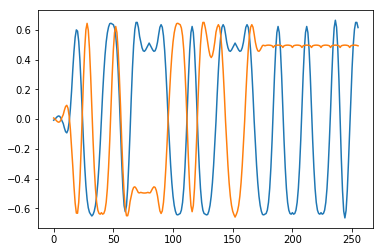

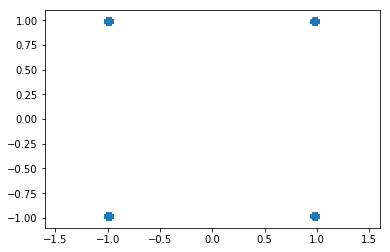

In [105]:
# modulate the signal
waveform_qpsk = modem_qpsk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj.reset()
filtered_qpsk = [matched_filter_obj.update(_) for _ in waveform_qpsk]

# plot the signal in time domain
plt.plot(np.real(waveform_qpsk[:256]))
plt.plot(np.imag(waveform_qpsk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_qpsk[offset:][::samples_per_symbol]), np.imag(filtered_qpsk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.1, 1.1)
plt.xlim(-1.6, 1.6)
plt.show()

#### 8PSK

In [78]:
modem_8psk_obj = generic_modem.generic_modem(   modulation_type = ["142", "8PSK 23/36"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

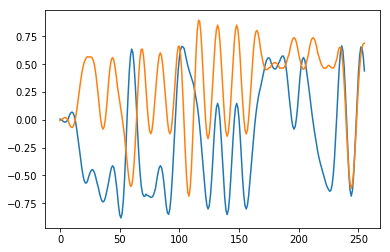

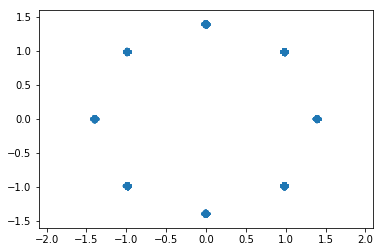

In [104]:
# modulate the signal
waveform_8psk = modem_8psk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj.reset()
filtered_8psk = [matched_filter_obj.update(_) for _ in waveform_8psk]

# plot the signal in time domain
plt.plot(np.real(waveform_8psk[:256]))
plt.plot(np.imag(waveform_8psk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_8psk[offset:][::samples_per_symbol]), np.imag(filtered_8psk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.6, 1.6)
plt.xlim(-2.1, 2.1)
plt.show()

### 8APSK

In [80]:
modem_8apsk_obj = generic_modem.generic_modem(  modulation_type = ["140", "8APSK 26/45-L"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

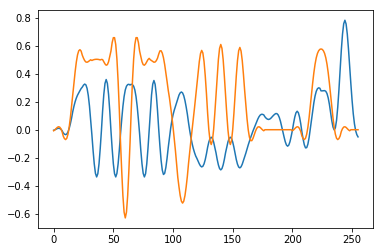

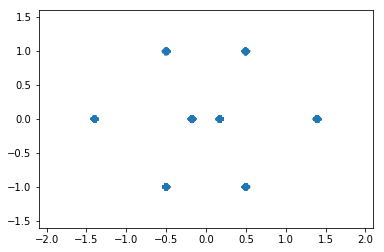

In [103]:
# modulate the signal
waveform_8apsk = modem_8apsk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj.reset()
filtered_8apsk = [matched_filter_obj.update(_) for _ in waveform_8apsk]

# plot the signal in time domain
plt.plot(np.real(waveform_8apsk[:256]))
plt.plot(np.imag(waveform_8apsk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_8apsk[offset:][::samples_per_symbol]), np.imag(filtered_8apsk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.6, 1.6)
plt.xlim(-2.1, 2.1)
plt.show()

#### 16APSK

In [82]:
modem_16apsk_obj = generic_modem.generic_modem( modulation_type = ["148", "16APSK 1/2-L"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

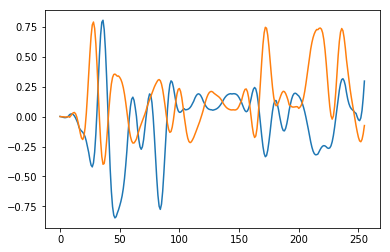

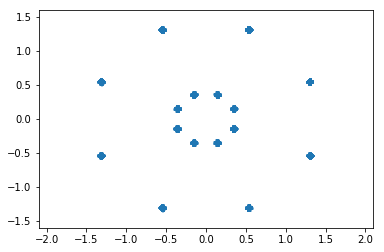

In [102]:
# modulate the signal
waveform_16apsk = modem_16apsk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj.reset()
filtered_16apsk = [matched_filter_obj.update(_) for _ in waveform_16apsk]

# plot the signal in time domain
plt.plot(np.real(waveform_16apsk[:256]))
plt.plot(np.imag(waveform_16apsk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_16apsk[offset:][::samples_per_symbol]), np.imag(filtered_16apsk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.6, 1.6)
plt.xlim(-2.1, 2.1)
plt.show()

#### 32APSK

In [84]:
modem_32apsk_obj = generic_modem.generic_modem( modulation_type = ["174", "32APSK 2/3-L"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

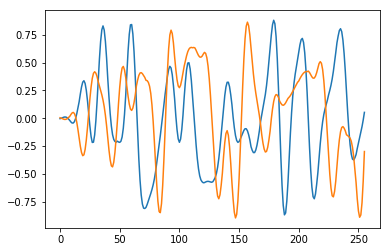

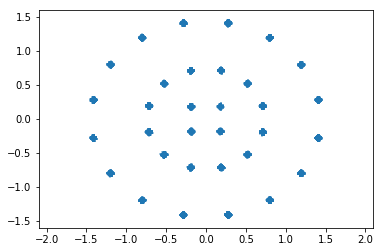

In [101]:
# modulate the signal
waveform_32apsk = modem_32apsk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj.reset()
filtered_32apsk = [matched_filter_obj.update(_) for _ in waveform_32apsk]

# plot the signal in time domain
plt.plot(np.real(waveform_32apsk[:256]))
plt.plot(np.imag(waveform_32apsk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_32apsk[offset:][::samples_per_symbol]), np.imag(filtered_32apsk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.6, 1.6)
plt.xlim(-2.1, 2.1)
plt.show()

#### 64APSK

In [86]:
modem_64apsk_obj = generic_modem.generic_modem( modulation_type = ["184", "64APSK 32/45-L"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

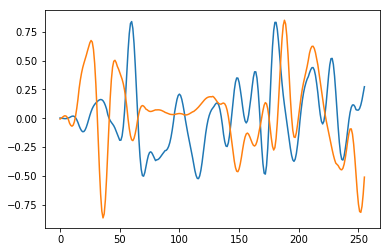

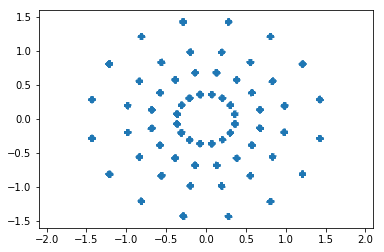

In [100]:
# modulate the signal
waveform_64apsk = modem_64apsk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj.reset()
filtered_64apsk = [matched_filter_obj.update(_) for _ in waveform_64apsk]

# plot the signal in time domain
plt.plot(np.real(waveform_64apsk[:256]))
plt.plot(np.imag(waveform_64apsk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_64apsk[offset:][::samples_per_symbol]), np.imag(filtered_64apsk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.6, 1.6)
plt.xlim(-2.1, 2.1)
plt.show()

#### 128APSK

In [96]:
modem_128apsk_obj = generic_modem.generic_modem(modulation_type = ["202", "128APSK 7/9"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

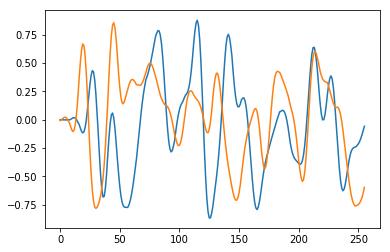

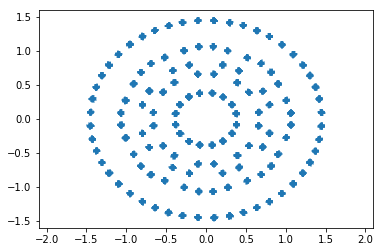

In [98]:
# modulate the signal
waveform_128apsk = modem_128apsk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj.reset()
filtered_128apsk = [matched_filter_obj.update(_) for _ in waveform_128apsk]

# plot the signal in time domain
plt.plot(np.real(waveform_128apsk[:256]))
plt.plot(np.imag(waveform_128apsk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_128apsk[offset:][::samples_per_symbol]), np.imag(filtered_128apsk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.6, 1.6)
plt.xlim(-2.1, 2.1)
plt.show()

#### 256APSK

In [92]:
modem_256apsk_obj = generic_modem.generic_modem(modulation_type = ["214", "256APSK 3/4"],
                                                samples_per_symbol = samples_per_symbol,
                                                pulse_factor = rrc_factor,
                                                pulse_length = pulse_length,
                                                filename = "../../library/DVB-S2X_constellations.json")

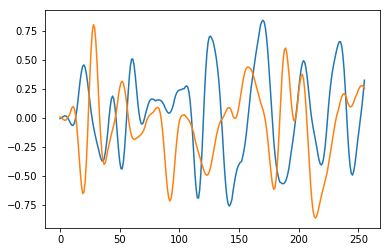

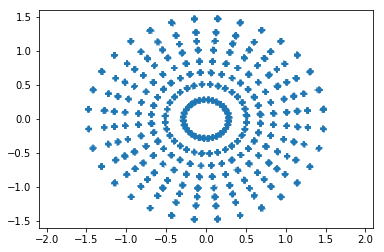

In [99]:
# modulate the signal
waveform_256apsk = modem_256apsk_obj.modulate(data)

# perform matched filtering so consetallation plot looks correct
matched_filter_obj.reset()
filtered_256apsk = [matched_filter_obj.update(_) for _ in waveform_256apsk]

# plot the signal in time domain
plt.plot(np.real(waveform_256apsk[:256]))
plt.plot(np.imag(waveform_256apsk[:256]))
plt.show()

# plot the constellation
offset = 64
plt.scatter(np.real(filtered_256apsk[offset:][::samples_per_symbol]), np.imag(filtered_256apsk[offset:][::samples_per_symbol]), marker='+', alpha=0.5)
plt.ylim(-1.6, 1.6)
plt.xlim(-2.1, 2.1)
plt.show()